In [1]:
from spriteworld import environment, renderers, sprite, tasks, action_spaces
import matplotlib.pyplot as plt, copy, numpy as np
%matplotlib inline

def viz(obs):
  plt.imshow(255 - obs)

In [2]:
s1 = sprite.Sprite(0.25, 0.25, 'triangle', c0=140,c1=220, c2=80, goal_x=0.1, goal_y=0.1)
s2 = sprite.Sprite(1., 0., 'square', c0=200,c2=255, goal_x=0.9, goal_y=0.1)
s3 = sprite.Sprite(0.25, 0.75, 'circle', c2=255, c1=210, goal_x=0.1, goal_y=0.9)
s4 = sprite.Sprite(0.50, 0.75, 'star_5', c0=255, c1=80)

b1 = sprite.Sprite(0.4, 0.4, is_barrier=True)
b2 = sprite.Sprite(0.3, 0.4, is_barrier=True)
b3 = sprite.Sprite(0.2, 0.4, is_barrier=True)

init_sprites = lambda: copy.deepcopy((b1, b2, b3, s1, s2, s3, s4))

In [6]:
GOAL_ENV_IMAGE_RENDERERS = {
  'observation': renderers.PILRenderer((100,100)),
  'achieved_goal': renderers.AchievedGoalRenderer(),
  'desired_goal': renderers.PILGoalRenderer((100, 100))
}

GOAL_ENV_VECTOR_RENDERERS = {
  'observation': renderers.VectorizedPositions(),
  'achieved_goal': renderers.AchievedGoalRenderer(),
  'desired_goal': renderers.VectorizedGoalPositions()
}

random_mtx = (np.random.rand(100, 100) - 0.5)*2.

GOAL_ENV_VECTOR_RENDERERS_RANDOM = {
  'observation': renderers.VectorizedPositions(),
  'achieved_goal': renderers.AchievedGoalRenderer(),
  'desired_goal': renderers.FunctionOfVectorizedGoalPositions(fn=lambda a: np.dot(random_mtx[:len(a),:len(a)], a))
}

In [7]:
env = environment.Environment(tasks.NoReward(), 
                              action_spaces.Navigate(), 
                              GOAL_ENV_VECTOR_RENDERERS,
                              init_sprites)

In [8]:
t = env.reset()
t.observation

{'observation': array([0.4 , 0.4 , 0.3 , 0.4 , 0.2 , 0.4 , 0.25, 0.25, 1.  , 0.  , 0.25,
        0.75, 0.5 , 0.75]),
 'achieved_goal': array([0.4 , 0.4 , 0.3 , 0.4 , 0.2 , 0.4 , 0.25, 0.25, 1.  , 0.  , 0.25,
        0.75, 0.5 , 0.75]),
 'desired_goal': array([0.4, 0.4, 0.3, 0.4, 0.2, 0.4, 0.1, 0.1, 0.9, 0.1, 0.1, 0.9, 0.5,
        0.5])}

In [9]:
env = environment.Environment(tasks.NoReward(), 
                              action_spaces.Navigate(), 
                              GOAL_ENV_VECTOR_RENDERERS_RANDOM,
                              init_sprites)

In [10]:
t = env.reset()
t.observation

{'observation': array([0.4 , 0.4 , 0.3 , 0.4 , 0.2 , 0.4 , 0.25, 0.25, 1.  , 0.  , 0.25,
        0.75, 0.5 , 0.75]),
 'achieved_goal': array([0.4 , 0.4 , 0.3 , 0.4 , 0.2 , 0.4 , 0.25, 0.25, 1.  , 0.  , 0.25,
        0.75, 0.5 , 0.75]),
 'desired_goal': array([ 1.06258545, -1.1111871 , -2.23511485, -0.71815638, -0.30934632,
        -1.78931567, -0.50290124, -1.44549556, -0.90826026, -0.20389556,
         0.54902285, -0.56592876,  1.64944907,  1.62088854])}

In [6]:
env = environment.Environment(tasks.NoReward(), 
                              action_spaces.Navigate(), 
                              GOAL_ENV_IMAGE_RENDERERS,
                              init_sprites)

In [7]:
t = env.reset()
list(t.observation.keys())

['observation', 'achieved_goal', 'desired_goal']

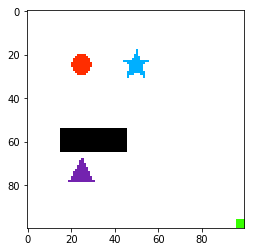

In [8]:
viz(t.observation['observation'])

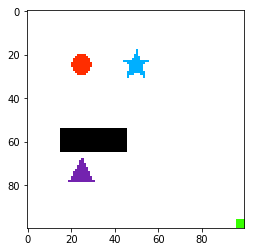

In [9]:
viz(t.observation['achieved_goal'])

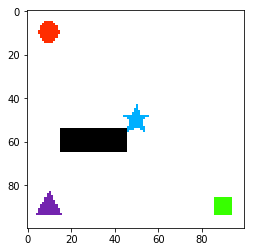

In [10]:
viz(t.observation['desired_goal'])

[<spriteworld.sprite.Sprite object at 0x7fe25ee4bef0>, <spriteworld.sprite.Sprite object at 0x7fe25ee4b668>, <spriteworld.sprite.Sprite object at 0x7fe25ee4b5c0>]
[<spriteworld.sprite.Sprite object at 0x7fe25ee611d0>, <spriteworld.sprite.Sprite object at 0x7fe25ee61a90>, <spriteworld.sprite.Sprite object at 0x7fe25ee61080>, <spriteworld.sprite.Sprite object at 0x7fe25ee61748>]
[<spriteworld.sprite.Sprite object at 0x7fe25ee4bef0>, <spriteworld.sprite.Sprite object at 0x7fe25ee4b668>, <spriteworld.sprite.Sprite object at 0x7fe25ee4b5c0>]
[<spriteworld.sprite.Sprite object at 0x7fe25ee611d0>, <spriteworld.sprite.Sprite object at 0x7fe25ee61a90>, <spriteworld.sprite.Sprite object at 0x7fe25ee61080>, <spriteworld.sprite.Sprite object at 0x7fe25ee61748>]
[<spriteworld.sprite.Sprite object at 0x7fe25ee4bef0>, <spriteworld.sprite.Sprite object at 0x7fe25ee4b668>, <spriteworld.sprite.Sprite object at 0x7fe25ee4b5c0>]
[<spriteworld.sprite.Sprite object at 0x7fe25ee611d0>, <spriteworld.sprite.Sp

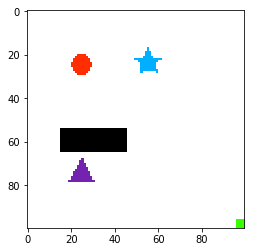

In [11]:
for i in range(5):
  t = env.step(env.action_space.sample())
viz(t.observation['observation'])

In [12]:
env._sprites[0].is_barrier

True